<h1>Importing Libraries </h1>

In [1]:
pip install --upgrade opencv-contrib-python

     ---------------------------------------- 44.9/44.9 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization ,experimental
from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow import keras
from keras.models import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [3]:
pwd

'C:\\Users\\NITR\\Desktop\\Citrus_Fruit_MultiClass_Classification'

In [4]:
#data path
trainpath = 'C:\\Users\\NITR\\Desktop\\Citrus_Fruit_MultiClass_Classification\\data\\train'#Please give the path where you are saving the train folder.
testpath = 'C:\\Users\\NITR\\Desktop\\Citrus_Fruit_MultiClass_Classification\\data\\test'#please give the path where you are saving the test folder.

<h1>Reading the Train Image </h1>

In [5]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):#entering train folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:# reading each images
      class_citrus={'Healthy':0,'BlackSpot':1,'Anthracnose':2}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_citrus[i])
      

Entering to the folder name: Anthracnose
Number of images in the folder is 50
Entering to the folder name: BlackSpot
Number of images in the folder is 50
Entering to the folder name: Healthy
Number of images in the folder is 50


<h1>Visualizing Train Images </h1>

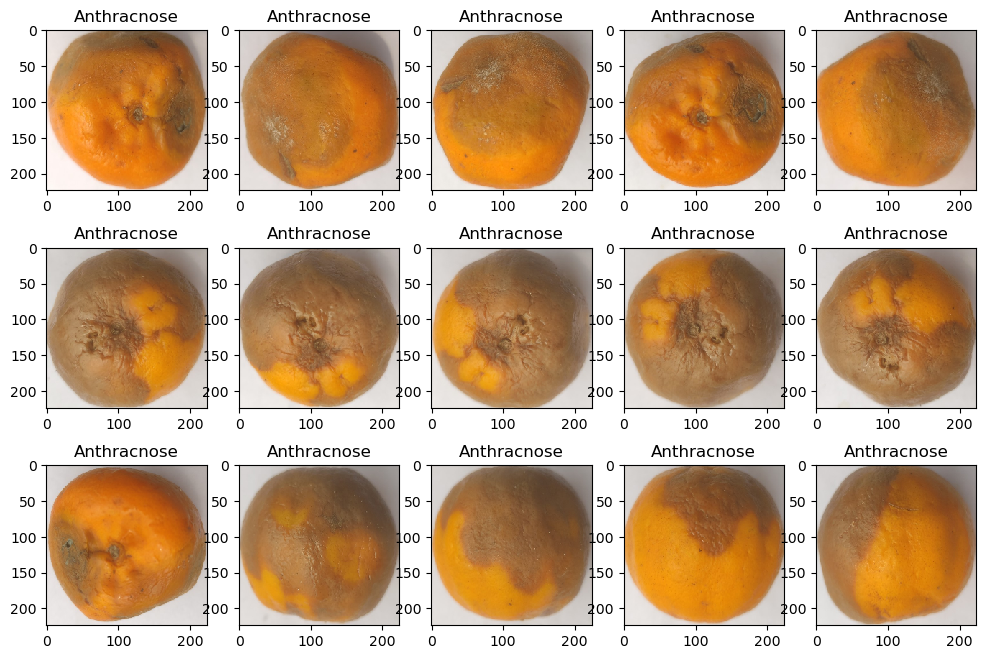

In [6]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Healthy')
    elif train_labels[i] == 1:
        ax.title.set_text('BlackSpot')
    elif train_labels[i] == 2:
        ax.title.set_text('Anthracnose')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

### Reading Test Images

In [7]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):# entering to the test folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:
      class_citrus={'Healthy':0,'BlackSpot':1,'Anthracnose':2}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_citrus[i])

Entering to the folder name: Anthracnose
Number of images in the folder is 50
Entering to the folder name: BlackSpot
Number of images in the folder is 50
Entering to the folder name: Healthy
Number of images in the folder is 50


## Visualizing Test Image

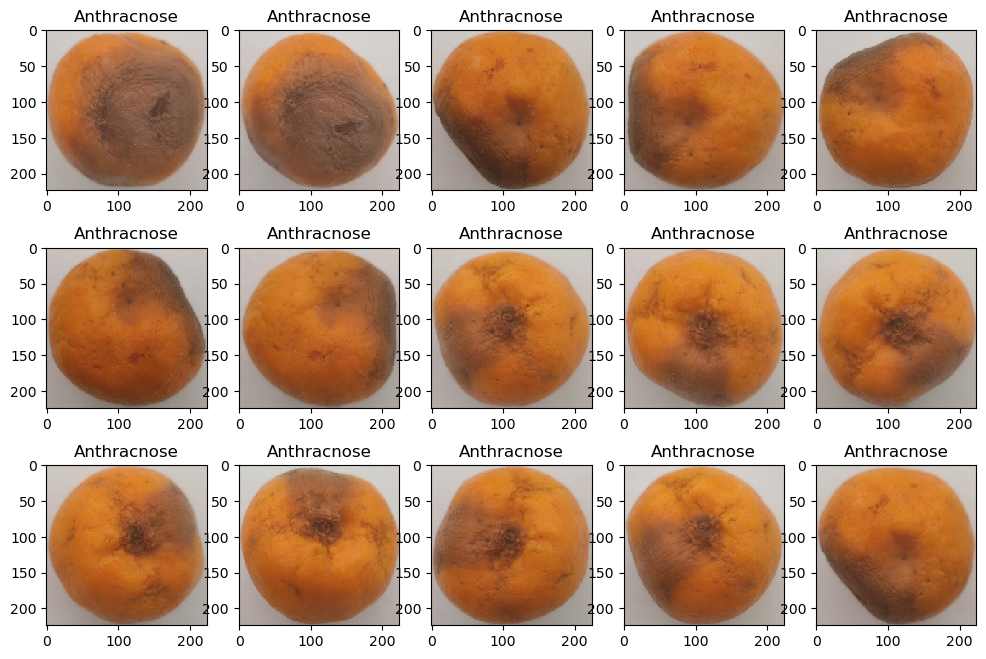

In [8]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('Healthy')
    elif test_labels[i] == 1:
        ax.title.set_text('BlackSpot')
    elif test_labels[i] == 2:
        ax.title.set_text('Anthracnose')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [9]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('Healthy')
    elif test_labels[i] == 1:
        ax.title.set_text('BlackSpot')
    elif test_labels[i] == 2:
        ax.title.set_text('Anthracnose')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [10]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(150, 224, 224, 3)
********************
(150,)
********************
(150, 224, 224, 3)
(150,)


In [11]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)

y_train,y_test=keras_to_categorical(y_train,y_test)

In [12]:
y_train.shape,y_test.shape

((150, 3), (150, 3))

##RAW VGG16

In [13]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=3,kernel_initializer="glorot_uniform", activation='softmax')(d1)
  output = Model(inputs =VGG_model.input, outputs =d2)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model16=model_vgg16()

In [14]:
model16.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [15]:
history = model16.fit(X_train, y_train, validation_split=0.2,
                    epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test)
                   )

Epoch 1/10
30/30 [==============================] - 21s 690ms/step - loss: 0.2857 - accuracy: 0.5667 - val_loss: 0.2321 - val_accuracy: 0.6533
Epoch 2/10
30/30 [==============================] - 21s 720ms/step - loss: 0.0819 - accuracy: 0.8667 - val_loss: 0.0045 - val_accuracy: 0.9933
Epoch 3/10
30/30 [==============================] - 22s 761ms/step - loss: 6.7053e-06 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 0.9800
Epoch 4/10
30/30 [==============================] - 22s 747ms/step - loss: 3.0884e-06 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 0.9867
Epoch 5/10
30/30 [==============================] - 22s 746ms/step - loss: 7.2078e-07 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.9933
Epoch 6/10
30/30 [==============================] - 22s 744ms/step - loss: 4.8576e-07 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 0.9933
Epoch 7/10
30/30 [==============================] - 22s 739ms/step - loss: 4.0534e-07 - accuracy: 1.0000 - val_loss: 0.0056 - 

### RAW VGG19

In [16]:
def model_vgg19():
  VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG19_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG19_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=3,kernel_initializer="glorot_uniform", activation='softmax')(d1)
  output = Model(inputs =VGG19_model.input, outputs =d2)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model19=model_vgg19()

In [17]:
model19.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [18]:
history = model19.fit(X_train, y_train, validation_split=0.2,
                    epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test)
                   )

Epoch 1/10
30/30 [==============================] - 26s 869ms/step - loss: 0.2492 - accuracy: 0.6067 - val_loss: 0.2608 - val_accuracy: 0.6000
Epoch 2/10
30/30 [==============================] - 27s 918ms/step - loss: 0.2226 - accuracy: 0.6667 - val_loss: 0.2260 - val_accuracy: 0.6600
Epoch 3/10
30/30 [==============================] - 27s 928ms/step - loss: 0.2274 - accuracy: 0.6533 - val_loss: 0.2270 - val_accuracy: 0.6600
Epoch 4/10
30/30 [==============================] - 27s 927ms/step - loss: 0.2205 - accuracy: 0.6667 - val_loss: 0.3062 - val_accuracy: 0.5267
Epoch 5/10
30/30 [==============================] - 27s 928ms/step - loss: 0.2241 - accuracy: 0.6600 - val_loss: 0.2757 - val_accuracy: 0.5533
Epoch 6/10
30/30 [==============================] - 28s 954ms/step - loss: 0.2227 - accuracy: 0.6667 - val_loss: 0.2222 - val_accuracy: 0.6667
Epoch 7/10
30/30 [==============================] - 27s 916ms/step - loss: 0.2222 - accuracy: 0.6667 - val_loss: 0.2222 - val_accuracy: 0.6667

### Feature Extraction of VGG-16

In [19]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_16=model_vgg16()

In [30]:
import pickle
model_FE_16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
pickle.dump(model_FE_16, open('model_FE_16.pkl','wb'))
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

5/5 [==============================] - 10s 2s/step


Train Accuracy Score 1.0
Test Accuracy Score 0.9933333333333333


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

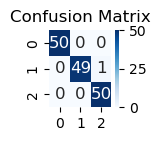

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_16,y_train)
train_pred=rf.predict(train_feature_16)
test_pred=rf.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

Train Accuracy Score 1.0
Test Accuracy Score 0.94


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

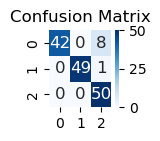

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc=dtc.fit(train_feature_16,y_train)
train_pred=dtc.predict(train_feature_16)
test_pred=dtc.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

Train Accuracy Score 1.0
Test Accuracy Score 0.9933333333333333


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

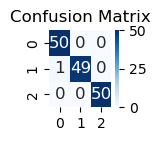

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc=etc.fit(train_feature_16,y_train)
train_pred=etc.predict(train_feature_16)
test_pred=etc.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

Train Accuracy Score 1.0
Test Accuracy Score 0.9933333333333333


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

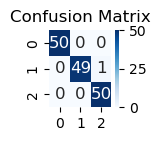

In [34]:
# K-Nearest Neighbour Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn=knn.fit(train_feature_16,y_train)
train_pred=knn.predict(train_feature_16)
test_pred=knn.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

Train Accuracy Score 1.0
Test Accuracy Score 0.9866666666666667


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

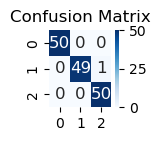

In [35]:
# MPL Classifier
from sklearn.neural_network import MLPClassifier
lr = MLPClassifier()
lr=lr.fit(train_feature_16,y_train)
train_pred=lr.predict(train_feature_16)
test_pred=lr.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

Train Accuracy Score 1.0
Test Accuracy Score 1.0


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

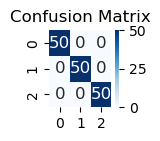

In [36]:
# Ridge Classifier
from sklearn.linear_model import RidgeClassifier
pac = RidgeClassifier()
pac=pac.fit(train_feature_16,y_train)
train_pred=pac.predict(train_feature_16)
test_pred=pac.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

### Feature Extraction VGG19

In [37]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_19=model_vgg19()

In [38]:
model_FE_19.compile(optimizer='Adam', loss='mse', metrics='accuracy')
pickle.dump(model_FE_19, open('model_FE_19.pkl','wb'))
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

5/5 [==============================] - 13s 3s/step


Train Accuracy Score 1.0
Test Accuracy Score 0.9933333333333333


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

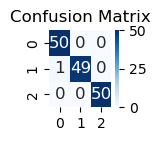

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_19,y_train)
train_pred=rf.predict(train_feature_19)
test_pred=rf.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

Train Accuracy Score 0.7266666666666667
Test Accuracy Score 0.68


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

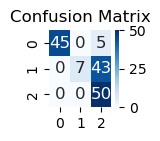

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc=dtc.fit(train_feature_16,y_train)
train_pred=dtc.predict(train_feature_19)
test_pred=dtc.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

Train Accuracy Score 1.0
Test Accuracy Score 0.9933333333333333


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

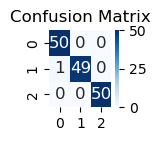

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc=etc.fit(train_feature_19,y_train)
train_pred=etc.predict(train_feature_19)
test_pred=etc.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

Train Accuracy Score 1.0
Test Accuracy Score 0.9933333333333333


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

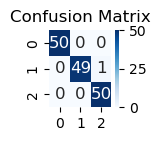

In [42]:
# K-Nearest Neighbour Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn=knn.fit(train_feature_19,y_train)
train_pred=knn.predict(train_feature_19)
test_pred=knn.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

Train Accuracy Score 1.0
Test Accuracy Score 0.9933333333333333


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

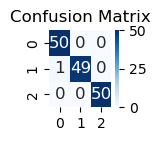

In [43]:
# MPL Classifier
from sklearn.neural_network import MLPClassifier
lr = MLPClassifier()
lr=lr.fit(train_feature_19,y_train)
train_pred=lr.predict(train_feature_19)
test_pred=lr.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

Train Accuracy Score 1.0
Test Accuracy Score 1.0


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

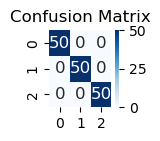

In [44]:
# Ridge Classifier
from sklearn.linear_model import RidgeClassifier
pac = RidgeClassifier()
pac=pac.fit(train_feature_19,y_train)
train_pred=pac.predict(train_feature_19)
test_pred=pac.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

### Fusion of Features in VGG16 & VGG19

In [45]:
final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))

Train Accuracy Score 1.0
Test Accuracy Score 1.0


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

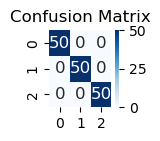

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(final_train,y_train)
train_pred=rf.predict(final_train)
test_pred=rf.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

Train Accuracy Score 1.0
Test Accuracy Score 0.9866666666666667


<Axes: title={'center': 'Confusion Matrix'}>

<Figure size 640x480 with 0 Axes>

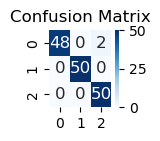

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc=dtc.fit(final_train,y_train)
train_pred=dtc.predict(final_train)
test_pred=dtc.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc=etc.fit(final_train,y_train)
train_pred=etc.predict(final_train)
test_pred=etc.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})
pickle.dump(model_FE_16, open('model_FE_16.pkl','wb'))

In [ ]:
# K-Nearest Neighbour Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn=knn.fit(final_train,y_train)
train_pred=knn.predict(final_train)
test_pred=knn.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

In [ ]:
# MPL Classifier
from sklearn.neural_network import MLPClassifier
lr = MLPClassifier()
lr=lr.fit(final_train,y_train)
train_pred=lr.predict(final_train)
test_pred=lr.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

In [ ]:
# Ridge Classifier
from sklearn.linear_model import RidgeClassifier
pac = RidgeClassifier()
pac=pac.fit(final_train,y_train)
train_pred=pac.predict(final_train)
test_pred=pac.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})

In [ ]:
# ExtraTree Classifier
from sklearn.tree import ExtraTreeClassifier
sgd = ExtraTreeClassifier()
sgd=sgd.fit(final_train,y_train)
train_pred=sgd.predict(final_train)
test_pred=sgd.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))
fig = plt.figure(1)
plt.figure(figsize=(1,1))
plt.title("Confusion Matrix")
cm = confusion_matrix(y_test.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cm,cmap="Blues",cbar=True, annot=True,annot_kws={"size": 12})